In [1]:
# Load packages
import requests 
import pandas as pd 
import time

from bs4 import BeautifulSoup 
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By

In [2]:
# def get_current_url(url,item): 
#     # service = Service(executable_path="selenium-webdriver/safari")
#     # driver = webdriver.Firefox(service=service)
#     service = Service(executable_path="/chromedriver")
#     driver = webdriver.Chrome(service=service)
#     driver.get(url)
#     time.sleep(3)
#     driver.find_element("xpath","/html/body/div[1]/div[2]/div/header/div[2]/div/div/div/div[1]/div/div/div/input").send_keys(item)
#     time.sleep(3)
#     driver.find_element("xpath", "/html/body/div[1]/div[2]/div/header/div[2]/div/div/div/div[5]/button").click()
#     time.sleep(3)
#     # try: 
#     #     # driver.find_element("xpath", '/html/body/div[1]/div[2]/div/header/div[2]/div/div/div/div[5]/button').click()
#     # except: 
#     #     driver.find_element("xpath", '/html/body/div[1]/div[2]/div/header/div[2]/div/div/div/div[5]/button').click()
#     current_url = driver.current_url
#     return current_url

current_url = 'https://www.lazada.sg/tag/bag'
print(current_url)

https://www.lazada.sg/tag/bag


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="a2o42" name="data-spm"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width" name="viewport"/>
<meta content="origin" name="referrer"/>
<link href="//s.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//as.alipayobjects.com" rel="preconnect dns-prefetch"/>
<link href="//d.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//cart.lazada.sg" rel="preconnect dns-prefetch"/>
<link href="//member.lazada.sg" rel="preconnect dns-prefetch"/>
<link href="//acs-m.lazada.sg" rel="preconnect dns-prefetch"/>
<link href="//laz-g-cdn.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//laz-img-cdn.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//assets.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//aeis.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//g.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//o.alicdn.com" rel="preconnect 
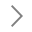

In [3]:
resp = requests.get(current_url)
content = BeautifulSoup(resp.content, 'lxml')
print(content)

In [26]:
def lazada_details(url):
    service = Service(executable_path="/chromedriver")
    driver = webdriver.Chrome(service=service)

    driver.get(url)
    content = driver.find_elements(By.CLASS_NAME,'buTCk')    
    lazada_list = []
    for post in content:
        data = {
                  "Name": None,
                  "Price": None,
                  "Sold": None,
                  "Country": None,
                  "Reviews": None,
            }
        try:
            data["Name"] = post.find_element(By.CLASS_NAME,'RfADt').text
        except:
            pass
        try:
            data["Price"] = post.find_element(By.CLASS_NAME, 'aBrP0').text
        except:
            pass
        try:
            data["Sold"] = post.find_element(By.CSS_SELECTOR, 'span._1cEkb > span:nth-child(1)').text
        except:
            pass
        try:
            data["Country"] = post.find_element(By.CLASS_NAME, 'oa6ri ').text
        except:
            pass
        try:
            data["Reviews"] = post.find_element(By.CLASS_NAME, 'qzqFw').text
        except:
            pass

        lazada_list.append(data)
    return pd.DataFrame(lazada_list)

In [27]:
df = lazada_details(current_url)
# df_jobs.to_csv("blackwell.csv", index=False)  
df

,Name,Price,Sold,Country,Reviews
0,LIXADA Kids Rolling Backpack for Girls Luggage...,$96.49,None,China,None
1,LIXADA Cycling Backpack Lightweight Bike Backp...,$27.50,None,China,None
2,Einashop Chastin Dumpling Bag SG Ship,$6.90,26 sold,Singapore,(1)
3,Bonia Men La Luna Postman Bag 866051-014,$350.00,None,Singapore,None
4,RIRIANN Children 10L Schoolbags Adjustable Bel...,$5.53,None,China,None
5,Hoyoho ~ High-end Sense Solid Color Casual Vin...,$10.28,None,China,None
6,CC SP 4 Color Sport Bags Nylon Waterproof Divi...,$3.26,None,China,None
7,CC SP Outdoor Handbag Storage Bag Folding Wind...,$9.19,None,China,None
8,HS Folding Sports Backpack Lightweight Waterpr...,$7.00,None,China,None
9,HS Men Tactical Backpack 30l Large Capacity Mu...,$28.30,None,China,None
